In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

file_path = 'C:/Users/7kingdom/Downloads/car+evaluation/car.data'

column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['buying']=label.fit_transform(df['buying'])
df['maint']=label.fit_transform(df['maint'])
df['doors']=label.fit_transform(df['doors'])
df['persons']=label.fit_transform(df['persons'])
df['lug_boot']=label.fit_transform(df['lug_boot'])
df['safety']=label.fit_transform(df['safety'])
df['class']=label.fit_transform(df['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [5]:
x = df
x = x.drop(columns=['class'], axis=1)

x

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [6]:
y = df['class']

y 

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

In [7]:
X = pd.get_dummies(x).values

X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [8]:
Y = pd.get_dummies(y).values

Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 154 (616.00 Byte)
Trainable params: 154 (616.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 2s 11ms/step - loss: 0.3816 - accuracy: 0.6838 - val_loss: 0.3192 - val_accuracy: 0.6936
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.7381 - val_loss: 0.2732 - val_accuracy: 0.7572
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.7656 - val_loss: 0.2567 - val_accuracy: 0.7543
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.7634 - val_loss: 0.2623 - val_accuracy: 0.7746
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.7677 - val_loss: 0.2543 - val_accuracy: 0.7341
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.7880 - val_loss: 0.2155 - val_accuracy: 0.8121
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.8169 - val_loss: 0.2745 - val_accuracy: 0.7399
Epoch 8/100


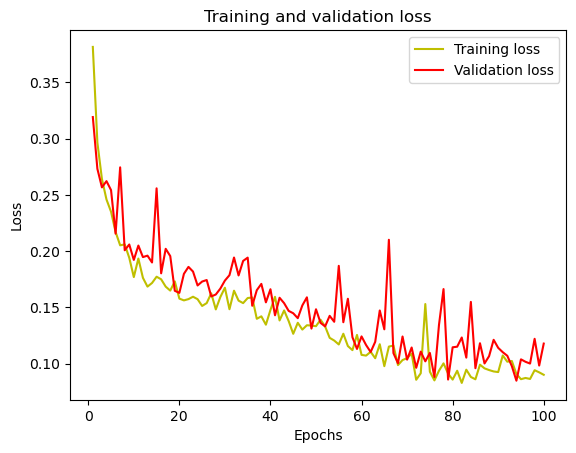

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

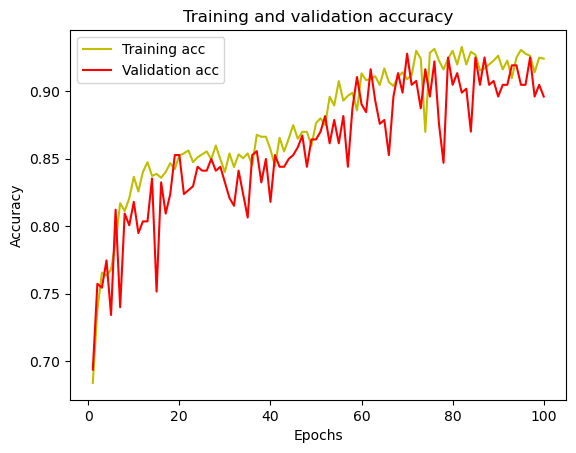

In [14]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()